# Covid-19 in the Philippines

Data as of January 10, 2022

Source: DOH Data Drop

Metadata: https://docs.google.com/spreadsheets/d/1rD77PMdxN6JMVeYmk7mvgDNtEHJt8Du6ozaLm_Qok0Q/edit#gid=1714687638

Download the CSV files from the DOH Data Drop and save them within the PATH. We'll start by combining the three CSVs into one data frame.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/Users/prinzmagtulis/.pyenv/versions/3.10.0/lib/python3.10/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 1000)
df = pd.concat(
    map(pd.read_csv, ['DOH COVID Data Drop_ 20220110 - 04 Case Information_batch_0.csv', 'DOH COVID Data Drop_ 20220110 - 04 Case Information_batch_1.csv', 'DOH COVID Data Drop_ 20220110 - 04 Case Information_batch_2.csv']), ignore_index=True)
df

/Users/prinzmagtulis/.pyenv/versions/3.10.0/lib/python3.10/site-packages/pandas/core/reshape/concat.py:294: DtypeWarning: Columns (15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  op = _Concatenator(
/Users/prinzmagtulis/.pyenv/versions/3.10.0/lib/python3.10/site-packages/pandas/core/reshape/concat.py:294: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  op = _Concatenator(


,CaseCode,Age,AgeGroup,Sex,DateSpecimen,DateResultRelease,DateRepConf,DateDied,DateRecover,RemovalType,Admitted,RegionRes,ProvRes,CityMunRes,CityMuniPSGC,BarangayRes,BarangayPSGC,HealthStatus,Quarantined,DateOnset,Pregnanttab,ValidationStatus
0,C404174,38.0,35 to 39,FEMALE,NaN,2020-01-30,2020-01-30,NaN,NaN,RECOVERED,NaN,Region VII: Central Visayas,NEGROS ORIENTAL,DUMAGUETE CITY (CAPITAL),PH074610000,NaN,NaN,RECOVERED,NO,2020-01-21,NO,"Health Status is ""Recovered"", but no Date Reco..."
1,C462688,44.0,40 to 44,MALE,NaN,2020-01-30,2020-02-03,2020-02-01,NaN,DIED,NaN,Region VII: Central Visayas,NEGROS ORIENTAL,DUMAGUETE CITY (CAPITAL),PH074610000,NaN,NaN,DIED,NO,2020-01-18,NaN,NaN
2,C387710,60.0,60 to 64,FEMALE,2020-01-23,2020-01-30,2020-02-05,NaN,2020-01-31,RECOVERED,YES,Region VII: Central Visayas,BOHOL,PANGLAO,PH071233000,NaN,NaN,RECOVERED,NO,2020-01-21,NO,Age or Birthdate is Invalid\nCase has Admittin...
3,C377460,49.0,45 to 49,MALE,NaN,NaN,2020-03-06,NaN,NaN,RECOVERED,YES,Region IV-A: CALABARZON,BATANGAS,SANTO TOMAS,PH041028000,NaN,NaN,RECOVERED,NO,NaN,NaN,"Removal Type is ""Recovered"", but no Recovered ..."
4,C498051,63.0,60 to 64,MALE,2020-03-05,NaN,2020-03-06,2020-03-11,NaN,DIED,NO,Region IV-A: CALABARZON,RIZAL,CAINTA,PH045805000,NaN,NaN,DIED,NO,NaN,NaN,"Case has Lab Result, but Result Date is blank"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2998525,NaN,35.0,35 to 39,MALE,2022-01-06,2022-01-09,2022-01-10,NaN,NaN,NaN,NaN,Region IV-A: CALABARZON,RIZAL,RODRIGUEZ (MONTALBAN),PH045808000,BURGOS,PH045808002,MILD,NO,NaN,NaN,NaN
2998526,NaN,45.0,45 to 49,MALE,2022-01-06,2022-01-07,2022-01-10,NaN,NaN,NaN,NaN,Region IV-A: CALABARZON,RIZAL,RODRIGUEZ (MONTALBAN),PH045808000,SAN ISIDRO,PH045808009,MILD,NO,2022-01-06,NaN,NaN
2998527,NaN,27.0,25 to 29,FEMALE,2022-01-07,2022-01-08,2022-01-10,NaN,NaN,NaN,NaN,NCR,NCR,PASAY CITY,PH137605000,BARANGAY 169,PH137605169,MILD,NO,NaN,NO,NaN
2998528,NaN,38.0,35 to 39,MALE,2022-01-05,2022-01-08,2022-01-10,NaN,NaN,NaN,NaN,NCR,NCR,CITY OF PARAÑAQUE,PH137604000,SAN MARTIN DE PORRES,PH137604014,MILD,NO,NaN,NaN,NaN


We basically combined all three CSVs into one file. 
You can save this single file into a CSV if you want to. 

In [3]:
df.DateRepConf = pd.to_datetime(df.DateRepConf, format="%Y-%m-%d")
df.DateDied = pd.to_datetime(df.DateDied, format="%Y-%m-%d")
df.DateRecover = pd.to_datetime(df.DateRecover, format="%Y-%m-%d")
df.DateOnset = pd.to_datetime(df.DateOnset, format="%Y-%m-%d")
df.DateResultRelease = pd.to_datetime(df.DateResultRelease, format="%Y-%m-%d")
df.DateSpecimen = pd.to_datetime(df.DateSpecimen, format="%Y-%m-%d")

In [4]:
df.dtypes
#This checks whether we successfully converted the columns above into datetime.

CaseCode                     object
Age                         float64
AgeGroup                     object
Sex                          object
DateSpecimen         datetime64[ns]
DateResultRelease    datetime64[ns]
DateRepConf          datetime64[ns]
DateDied             datetime64[ns]
DateRecover          datetime64[ns]
RemovalType                  object
Admitted                     object
RegionRes                    object
ProvRes                      object
CityMunRes                   object
CityMuniPSGC                 object
BarangayRes                  object
BarangayPSGC                 object
HealthStatus                 object
Quarantined                  object
DateOnset            datetime64[ns]
Pregnanttab                  object
ValidationStatus             object
dtype: object

In [5]:
df['CityMunRes'] = df['CityMunRes'].str.capitalize()
df['ProvRes'] = df['ProvRes'].str.capitalize()

# Cleaning the data

## Looking for duplicates

Look for potential duplicates through the **Case Code** column. **True** means there are duplicates.

In [6]:
df.duplicated().value_counts()

False    2996883
True        1647
dtype: int64

There are **1,647 duplicated records** found in the report. These duplicated records mean they have matching entries **across all columns**.

DOH, in its daily case reports, continuously clean the data and regularly reports and removes duplicates.

In the meantime, we will be **keeping the duplicates** for the purpose of our analysis. We are confident that because duplicates account for less than 1% of the total, it won't affect the overall Covid-19 picture.

In [7]:
df[df.duplicated(keep='first')].sort_values('Age')
#This supposedly shows the duplicated entries arranged by 'Age'. Remember, these entries are checked similar
#across all columns in at least another entry. They are just arranged by age.

,CaseCode,Age,AgeGroup,Sex,DateSpecimen,DateResultRelease,DateRepConf,DateDied,DateRecover,RemovalType,Admitted,RegionRes,ProvRes,CityMunRes,CityMuniPSGC,BarangayRes,BarangayPSGC,HealthStatus,Quarantined,DateOnset,Pregnanttab,ValidationStatus
2984652,NaN,0.0,0 to 4,FEMALE,2022-01-07,2022-01-07,2022-01-10,NaT,NaT,NaN,NaN,NCR,Ncr,City of manila,PH133905000,BARANGAY 311,PH133905013,MILD,NO,NaT,NO,NaN
2971574,NaN,0.0,0 to 4,FEMALE,2022-01-07,2022-01-07,2022-01-10,NaT,NaT,NaN,NaN,NCR,Ncr,City of manila,PH133905000,BARANGAY 311,PH133905013,MILD,NO,NaT,NO,NaN
2992438,NaN,0.0,0 to 4,FEMALE,2022-01-07,2022-01-07,2022-01-10,NaT,NaT,NaN,NaN,NCR,Ncr,City of manila,PH133905000,BARANGAY 311,PH133905013,MILD,NO,NaT,NO,NaN
2965167,NaN,1.0,0 to 4,FEMALE,2022-01-06,2022-01-07,2022-01-09,NaT,NaT,NaN,NaN,NCR,Ncr,City of valenzuela,PH137504000,PARADA,PH137504004,MILD,NO,NaT,NO,NaN
2997204,NaN,1.0,0 to 4,MALE,2022-01-05,2022-01-06,2022-01-10,NaT,NaT,NaN,NaN,NCR,Ncr,City of las piñas,PH137601000,TALON DOS,PH137601017,MILD,NO,NaT,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2993474,NaN,68.0,65 to 69,MALE,2022-01-06,2022-01-07,2022-01-10,NaT,NaT,NaN,NaN,NCR,Ncr,Quezon city,PH137404000,CULIAT,PH137404025,MILD,NO,NaT,NaN,NaN
2942633,C90612132,69.0,65 to 69,FEMALE,2022-01-06,2022-01-07,2022-01-09,NaT,2021-05-13,NaN,NaN,NCR,Ncr,City of makati,PH137602000,WEST REMBO,PH137602032,MILD,NO,NaT,NO,"Case has Lab Result, but Result Date is blank"
2992238,NaN,73.0,70 to 74,FEMALE,2022-01-07,2022-01-08,2022-01-10,NaT,NaT,NaN,NaN,NCR,Ncr,City of las piñas,PH137601000,TALON DOS,PH137601017,MILD,NO,NaT,NO,NaN
2962164,NaN,75.0,75 to 79,FEMALE,2022-01-06,2022-01-06,2022-01-09,NaT,NaT,NaN,NaN,NCR,Ncr,City of muntinlupa,PH137603000,ALABANG,PH137603001,MILD,NO,NaT,NO,NaN


## Handling NaN values

There are also issues with **NaNs** which means there was no data input. One issue I stumbled upon quite belatedly was the fact that **'CaseCode'** indicator actually has a lot of null values (see below).

In [69]:
df.CaseCode.isna().value_counts()

False    2938333
True       60197
Name: CaseCode, dtype: int64

At over **60,000** null values, this can easily underestimate the number of cases especially when we **resample** since resampling DOES NOT count null values.

After spending some time to find a go around on this problem, I ended up just **checking other indicators if they have less null values** that would allow us to at least better estimate cases.

Thankfully, there is the **Sex** indicator which has NONE.

In [53]:
df.Sex.isna().value_counts()

False    2998530
Name: Sex, dtype: int64

# Case data

Note: Just remove **.tail()** to get all dates here. **.tail()** shows the last entries while the number inside paranthesis signify how many last entries are shown. Default shows last 10 entries. Alternatively: **.head()**

## DateRepConf

Pertains to data when cases are publicly reported **(this is what is closely followed and reported in the media).** Caveat is this can include case positives from previous days because of delays in test processing and reporting.

For instance, cases may be reported on January 2, but based on testing data on December 31.

Furthemore, data from previous days may be subject to change as DOH said it is constantly reviewing the reports' veracity and removing some potential duplicates.

In [72]:
df.resample('D', on='DateRepConf').Sex.count().tail(10)

DateRepConf
2022-01-01     3613
2022-01-02     4597
2022-01-03     4077
2022-01-04     5427
2022-01-05    10758
2022-01-06    17184
2022-01-07    21688
2022-01-08    26445
2022-01-09    28701
2022-01-10    33169
Freq: D, Name: Sex, dtype: int64

<AxesSubplot:title={'center':'Covid-19 cases in Philippines'}, xlabel='DateRepConf'>

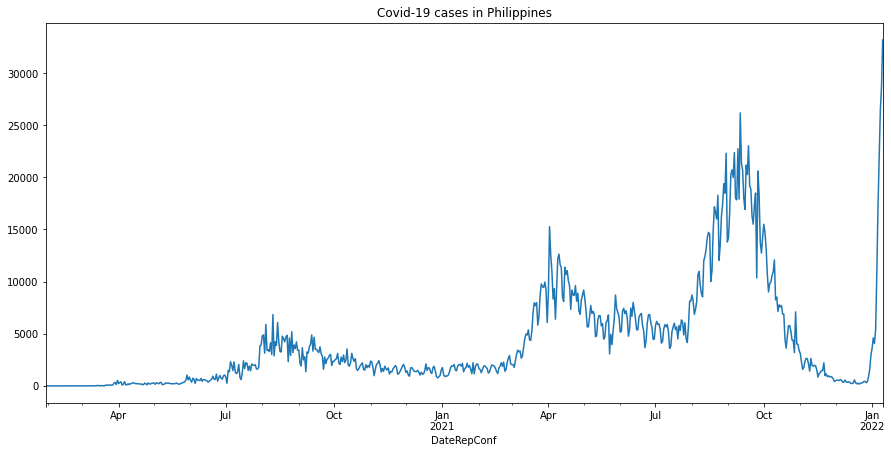

In [71]:
df.resample('D', on='DateRepConf').Sex.count().plot(title= 'Covid-19 cases in Philippines', figsize = (15, 7))

# Two week rolling case average

You can change the time frame of the rolling average by changing the number of **days** inside the paranthesis after **rolling.**

In [55]:
df.resample('D', on='DateRepConf').Sex.count().rolling(14).mean().round().tail(20)

DateRepConf
2021-12-22      326.0
2021-12-23      307.0
2021-12-24      302.0
2021-12-25      307.0
2021-12-26      310.0
2021-12-27      307.0
2021-12-28      319.0
2021-12-29      366.0
2021-12-30      461.0
2021-12-31      630.0
2022-01-01      868.0
2022-01-02     1181.0
2022-01-03     1454.0
2022-01-04     1830.0
2022-01-05     2579.0
2022-01-06     3786.0
2022-01-07     5314.0
2022-01-08     7172.0
2022-01-09     9191.0
2022-01-10    11537.0
Freq: D, Name: Sex, dtype: float64

Text(0, 0.5, 'Cases')

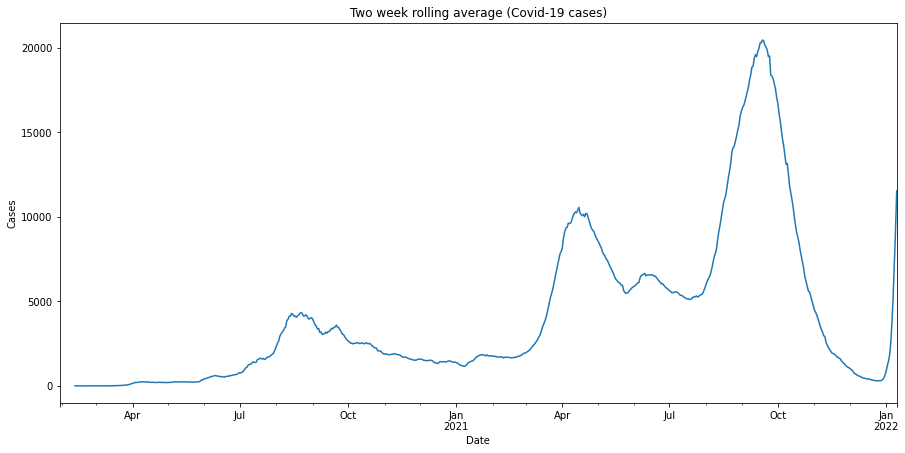

In [56]:
ax = df.resample('D', on='DateRepConf').Sex.count().rolling(14).mean().plot(title='Two week rolling average (Covid-19 cases)', figsize = (15, 7))
ax.set_xlabel("Date")
ax.set_ylabel("Cases")

## DateOnset

Pertains to cases when date of illness or when symptoms manifest. Sometimes, people are not tested until cases manifest and processing of cases take time. DateOnset records cases based on when the illness first manifested, not when test results were released.

DOH said when DateOnset cannot be confirmed, the agency uses DateSpecimen (date of specimen collection for testing, see below) as proxy.

In [57]:
df.resample('D', on='DateOnset').Sex.count().tail(10)

DateOnset
2021-12-31    1395
2022-01-01    2533
2022-01-02    3088
2022-01-03    4055
2022-01-04    4076
2022-01-05    2750
2022-01-06    2443
2022-01-07    1676
2022-01-08     350
2022-01-09       1
Name: Sex, dtype: int64

## DateSpecimen

Pertains to when specimen was collected from suspected case for Covid-19 testing. Data show those who tested positive after testing, but date used to report case is based on when the specimen is collected, instead of when results came out positive.

DOH said when DateOnset cannot be confirmed, the agency uses DateSpecimen (date of specimen collection for testing) as proxy.

In [58]:
df.resample('D', on='DateSpecimen').Sex.count().tail(10)

DateSpecimen
2021-12-31     4869
2022-01-01     4516
2022-01-02     8800
2022-01-03    23612
2022-01-04    29131
2022-01-05    30105
2022-01-06    26129
2022-01-07    15855
2022-01-08     4138
2022-01-09        6
Name: Sex, dtype: int64

## DateRecover

Pertains to date when cases recovered from Covid-19. Not used in reporting "recoveries" data every day. 

In [59]:
df[df.HealthStatus=="RECOVERED"].resample('D', on='DateRepConf').size().tail(10)

DateRepConf
2022-01-01    2459
2022-01-02     567
2022-01-03     139
2022-01-04      30
2022-01-05      68
2022-01-06      68
2022-01-07     110
2022-01-08     130
2022-01-09      90
2022-01-10     129
Freq: D, dtype: int64

## DateDied

Pertains to date when cases died from Covid-19. Not used in reporting "deaths" data every day. 

In [60]:
df[df.RemovalType=="DIED"].resample('D', on='DateDied').size().tail(10)

DateDied
2021-12-30    14
2021-12-31    14
2022-01-01     4
2022-01-02     3
2022-01-03     8
2022-01-04     9
2022-01-05     4
2022-01-06     9
2022-01-07     4
2022-01-08     1
dtype: int64

Note: Clearly when used to resample, DateRecovered and DateDied columns underestimate both figures as reported. This can be due to a number of reasons, including some deaths and recoveries bearing no date.

# Which regions have the highest number of Covid-19 cases so far?

In [42]:
df.RegionRes.value_counts(dropna=False)
#ROF stands for returning overseas Filipinos
#Over 3,600 (0.12%) have no indicated regional location.

NCR                               962321
Region IV-A: CALABARZON           528841
Region III: Central Luzon         295865
Region VII: Central Visayas       155693
Region VI: Western Visayas        154327
Region II: Cagayan Valley         139830
Region XI: Davao Region           107517
Region I: Ilocos Region           107182
CAR                                94067
Region X: Northern Mindanao        86380
Region XII: SOCCSKSARGEN           60597
Region IX: Zamboanga Peninsula     54213
Region VIII: Eastern Visayas       54033
Region V: Bicol Region             53204
CARAGA                             51297
Region IV-B: MIMAROPA              38198
ROF                                31224
BARMM                              20085
NaN                                 3656
Name: RegionRes, dtype: int64

Interpretation: Nearly half of Covid-19 cases were detected in Metro Manila and Calabarzon.

# Which provinces have the highest number of Covid-19 cases so far?

In [47]:
df.ProvRes.value_counts(dropna=False).head(10)
#Over 43,000 (1.4%) have no information into provincial location.

Ncr                  955554
Cavite               173682
Laguna               131080
Rizal                114427
Bulacan              113080
Cebu                 109664
Batangas              76933
Pampanga              71642
Davao del sur         67324
Negros occidental     60508
Name: ProvRes, dtype: int64

# Which municipalities?

In [46]:
df.CityMunRes.value_counts(dropna=False).head(15)
#Over 57,000 (nearly 2%) people infected have no information on their municipal location.

Quezon city            199504
City of manila         121049
Caloocan city           70391
Taguig city             68641
City of pasig           67768
City of makati          65534
NaN                     57003
City of parañaque       55504
Davao city              55378
Cebu city (capital)     43062
Pasay city              43014
City of valenzuela      42888
City of las piñas       39587
City of mandaluyong     37945
City of muntinlupa      32616
Name: CityMunRes, dtype: int64

Interpretation: Seven cities from Metro Manila top the list of number of people infected with Covid-19. Davao City in Mindanao follow them.

# Track cases per day per province

Warning: This can be quite heavy because of the number of provinces (87) involved. But the beauty of this is you can save this df into a separate CSV (using the df name **'df_prov'**) if you'd like. 

Code also applicable to municipal, regional and barangay level. But be careful as the data get more granular as there could be some problem (see below).

In [62]:
df_prov = df.pivot_table(columns="ProvRes", index='DateRepConf', values='Sex', aggfunc='count', fill_value='0', dropna=False)
df_prov.tail(20)

ProvRes,Abra,Agusan del norte,Agusan del sur,Aklan,Albay,Antique,Apayao,Aurora,Basilan,Bataan,Batanes,Batangas,Benguet,Biliran,Bohol,Bukidnon,Bulacan,Cagayan,Camarines norte,Camarines sur,Camiguin,Capiz,Catanduanes,Cavite,Cebu,City of isabela (not a province),Cotabato (north cotabato),Cotabato city (not a province),Davao de oro,Davao del norte,Davao del sur,Davao occidental,Davao oriental,Dinagat islands,Eastern samar,Guimaras,Ifugao,Ilocos norte,Ilocos sur,Iloilo,Isabela,Kalinga,La union,Laguna,Lanao del norte,Lanao del sur,Leyte,Maguindanao,Marinduque,Masbate,Misamis occidental,Misamis oriental,Mountain province,Ncr,Negros occidental,Negros oriental,Northern samar,Nueva ecija,Nueva vizcaya,Occidental mindoro,Oriental mindoro,Palawan,Pampanga,Pangasinan,Quezon,Quirino,Rizal,Romblon,Samar (western samar),Sarangani,Siquijor,Sorsogon,South cotabato,Southern leyte,Sultan kudarat,Sulu,Surigao del norte,Surigao del sur,Tarlac,Tawi-tawi,Zambales,Zamboanga del norte,Zamboanga del sur,Zamboanga sibugay
DateRepConf,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-12-22,1.0,2.0,3.0,0,1.0,1.0,1.0,0,1.0,2.0,1.0,1.0,2.0,0,1.0,0,6.0,3.0,0,0,0,3.0,0,9.0,4.0,0,0,1.0,6.0,1.0,6.0,0,0,0,0,1.0,1.0,1.0,1.0,6.0,6.0,0,3.0,7.0,4.0,0,0,0,1.0,0,0,1.0,0,71.0,7.0,2.0,0,5.0,2.0,3.0,3.0,0,1.0,10.0,3.0,0,9.0,0,0,2.0,0,0,6.0,0,0,0,0,2.0,5.0,0,0,1.0,12.0,0
2021-12-23,0,1.0,1.0,1.0,2.0,1.0,4.0,0,0,1.0,0,3.0,2.0,0,2.0,0,5.0,0,0,1.0,0,2.0,2.0,8.0,2.0,0,0,0,2.0,2.0,2.0,0,0,0,0,0,0,1.0,0,18.0,8.0,1.0,2.0,2.0,0,0,1.0,0,0,0,0,2.0,1.0,90.0,15.0,10.0,4.0,1.0,2.0,6.0,10.0,0,0,1.0,2.0,0,4.0,0,1.0,0,0,1.0,3.0,0,0,2.0,0,0,8.0,0,1.0,1.0,16.0,2.0
2021-12-24,0,2.0,2.0,0,2.0,0,1.0,0,0,1.0,0,5.0,4.0,1.0,3.0,1.0,9.0,2.0,0,3.0,0,0,0,6.0,5.0,0,1.0,0,5.0,2.0,5.0,0,0,0,0,1.0,0,0,0,11.0,11.0,0,1.0,2.0,0,0,2.0,0,0,0,0,2.0,0,124.0,8.0,3.0,0,3.0,0,0,3.0,2.0,2.0,9.0,3.0,1.0,14.0,0,0,0,1.0,0,5.0,0,1.0,2.0,0,0,5.0,0,2.0,0,4.0,1.0
2021-12-25,0,1.0,2.0,1.0,2.0,0,5.0,1.0,2.0,3.0,0,4.0,3.0,0,2.0,1.0,10.0,4.0,0,1.0,0,1.0,0,22.0,2.0,0,1.0,1.0,2.0,4.0,14.0,0,1.0,2.0,0,0,0,2.0,1.0,15.0,4.0,0,3.0,4.0,1.0,0,3.0,2.0,0,1.0,0,4.0,0,191.0,15.0,1.0,0,7.0,0,0,3.0,1.0,1.0,6.0,1.0,0,11.0,0,1.0,0,0,0,5.0,0,0,2.0,0,1.0,5.0,0,3.0,1.0,13.0,2.0
2021-12-26,0,0,0,0,0,0,4.0,0,0,2.0,0,3.0,1.0,0,1.0,0,11.0,5.0,0,2.0,0,0,0,15.0,2.0,1.0,0,1.0,3.0,4.0,1.0,0,0,0,0,0,1.0,0,4.0,2.0,8.0,0,0,5.0,0,0,2.0,0,0,0,0,2.0,0,215.0,5.0,2.0,0,9.0,0,1.0,1.0,17.0,0,13.0,3.0,3.0,11.0,2.0,0,1.0,0,2.0,9.0,0,0,0,0,0,5.0,0,4.0,0,12.0,1.0
2021-12-27,0,1.0,2.0,0,0,0,0,0,0,1.0,0,5.0,4.0,1.0,0,4.0,13.0,2.0,0,0,0,0,0,12.0,3.0,0,0,0,2.0,7.0,2.0,2.0,0,1.0,0,0,0,4.0,0,5.0,0,0,2.0,7.0,1.0,0,2.0,0,0,0,0,2.0,0,119.0,6.0,1.0,0,2.0,2.0,0,0,1.0,2.0,3.0,2.0,1.0,17.0,0,3.0,0,0,1.0,1.0,0,0,1.0,0,0,0,0,3.0,2.0,6.0,1.0
2021-12-28,0,0,10.0,4.0,0,0,0,0,0,5.0,0,4.0,0,0,1.0,2.0,21.0,3.0,0,0,0,0,0,15.0,3.0,1.0,1.0,0,0,4.0,3.0,0,0,0,0,0,0,0,0,6.0,5.0,0,0,12.0,1.0,0,3.0,0,0,0,0,3.0,0,162.0,7.0,0,0,4.0,2.0,0,2.0,0,3.0,11.0,1.0,2.0,14.0,0,0,1.0,1.0,0,9.0,0,1.0,0,1.0,3.0,2.0,0,2.0,1.0,14.0,0
2021-12-29,0,1.0,2.0,0,0,3.0,6.0,0,1.0,4.0,0,13.0,8.0,0,2.0,1.0,29.0,3.0,0,1.0,1.0,6.0,0,28.0,5.0,0,0,0,0,1.0,2.0,0,0,0,0,0,0,4.0,0,8.0,1.0,0,4.0,21.0,4.0,1.0,1.0,0,0,0,1.0,7.0,0,560.0,14.0,1.0,1.0,4.0,1.0,1.0,3.0,3.0,4.0,8.0,4.0,1.0,19.0,0,0,0,0,1.0,7.0,1.0,2.0,2.0,0,0,7.0,0,8.0,1.0,23.0,0
2021-12-30,0,2.0,1.0,4.0,3.0,1.0,1.0,0,2.0,6.0,0,21.0,18.0,0,1.0,5.0,43.0,8.0,0,1.0,0,4.0,0,70.0,7.0,0,2.0,1.0,4.0,5.0,7.0,0,1.0,0,2.0,0,0,0,1.0,13.0,10.0,1.0,4.0,33.0,0,1.0,4.0,2.0,0,0,1.0,8.0,1.0,1107.0,27.0,3.0,0,5.0,1.0,0,4.0,7.0,13.0,5.0,5.0,0,40.0,0,1.0,1.0,0,2.0,6.0,1.0,3.0,0,0,0,15.0,1.0,13.0,7.0,11.0,4.0


Strictly speaking, you can pivot table **municipal and barangay** data as well to get a similar table like above. However, there can be some problems with how the data was input. For instance, at the municipal level, there are towns with similar names like **Alcala** which is a town's name in both **Ilocos Region** and **Cagayan.**

The problem is pandas does not differentiate between the two ALCALAs when pivoting and just merge their numbers even if **they pertain to different locations.** My solution then is to just use **groupby** and then transform your data into a df through **to_frame()** to enable export to CSV. 

However, it's kind of messy **(Remove hashtag and see below)**.

In [49]:
#df_munc = df.CityMunRes.value_counts().sort_index()
df_munc = df.groupby("ProvRes").CityMunRes.value_counts().sort_index()
df_munc

ProvRes            CityMunRes       
Abra               Bangued (capital)    908
                   Boliney              185
                   Bucay                262
                   Bucloc               105
                   Daguioman             58
                                       ... 
Zamboanga sibugay  Roseller lim         138
                   Siay                 356
                   Talusan               48
                   Titay                421
                   Tungawan             217
Name: CityMunRes, Length: 1634, dtype: int64

# How is a location's infection tally through time (one loc at a time)?

Applicable for provinces, municipalities, regions.

In [63]:
#Example for region
df[df.RegionRes=="NCR"].resample('D', on='DateRepConf').Sex.count().tail(10)

DateRepConf
2022-01-01     2546
2022-01-02     3367
2022-01-03     2870
2022-01-04     3874
2022-01-05     7541
2022-01-06    11677
2022-01-07    13743
2022-01-08    16242
2022-01-09    16924
2022-01-10    18629
Freq: D, Name: Sex, dtype: int64

In [68]:
#Example for municipalities
df[df.CityMunRes=="Quezon city"].resample('D', on='DateRepConf').Sex.count().tail(10)

DateRepConf
2022-01-01     426
2022-01-02     662
2022-01-03     597
2022-01-04     999
2022-01-05    1819
2022-01-06    2405
2022-01-07    3097
2022-01-08    3514
2022-01-09    3633
2022-01-10    4668
Freq: D, Name: Sex, dtype: int64

<AxesSubplot:title={'center':'QC cases'}, xlabel='DateRepConf'>

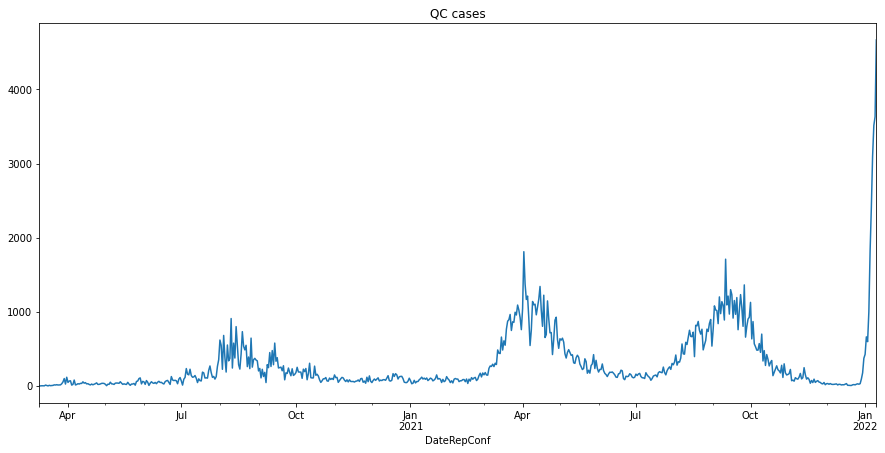

In [65]:
df[df.CityMunRes=="Quezon city"].resample('D', on='DateRepConf').Sex.count().plot(title="QC cases", figsize = (15, 7))

# How young/old are the infected?

In [28]:
df.AgeGroup.value_counts(normalize=True, dropna=False) * 100
#0.1% of people infected did not indicate age.

25 to 29    13.952637
30 to 34    12.433392
20 to 24    10.214505
35 to 39     9.625216
40 to 44     8.275121
45 to 49     6.884607
50 to 54     6.447626
55 to 59     5.785368
60 to 64     4.603156
15 to 19     4.549329
65 to 69     3.485541
10 to 14     3.151511
70 to 74     2.536810
5 to 9       2.366493
0 to 4       2.278016
80+          1.807486
75 to 79     1.514809
NaN          0.088377
Name: AgeGroup, dtype: float64

Text(0, 0.5, 'Cases')

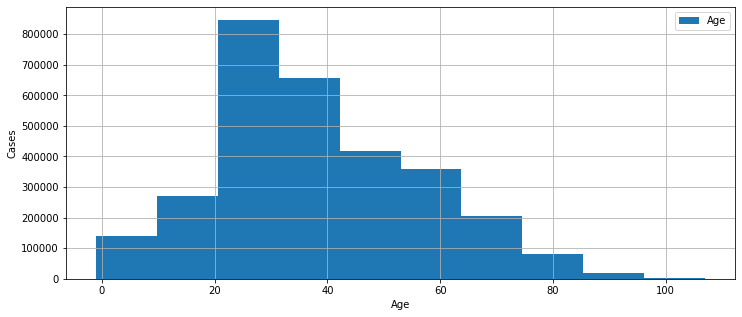

In [29]:
ax= df.Age.hist(legend=True, figsize = (12, 5))
ax.set_xlabel("Age")
ax.set_ylabel("Cases")

# How many males and females? How many are admitted to hospital?

**normalize=True** will get you the percentage share.

In [30]:
df.Sex.value_counts(dropna=False, normalize=True) * 100
#Nearly equal number of females and males infected with Covid-19

FEMALE    50.251056
MALE      49.748944
Name: Sex, dtype: float64

In [31]:
df.Admitted.value_counts(dropna=False)
#NaN means no answer

NaN    1947900
NO      940329
YES     110301
Name: Admitted, dtype: int64

# Testing

We now go to testing data, which is contained in a separate CSV file from the DOH Data Drop. We read through the file first.

Notice again how there are **NaNs** in some rows. Some of them you can ignore because of the type of data (i.e. **daily_output_unique_individuals** where NaN essentially means there were no test conducted that day.

You can check whether they have a significant impact on the broader picture by running **isna** in certain columns or putting **dropna=False** in your **value_counts**.

Try this:
df[df.daily_output_unique_individuals.isna()]

In [32]:
df_test = pd.read_csv("DOH COVID Data Drop_ 20220110 - 07 Testing Aggregates.csv")
df_test

,facility_name,report_date,avg_turnaround_time,daily_output_samples_tested,daily_output_unique_individuals,daily_output_positive_individuals,daily_output_negative_individuals,daily_output_equivocal,daily_output_invalid,remaining_available_tests,backlogs,cumulative_samples_tested,cumulative_unique_individuals,cumulative_positive_individuals,cumulative_negative_individuals,pct_positive_cumulative,pct_negative_cumulative,validation_status
0,A Star Laboratories,2020-12-08,24.0,15.0,15.0,1.0,14.0,0.0,0.0,8.0,0.0,15,15,1,14,0.07,0.93,NaN
1,A Star Laboratories,2020-12-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,15,1,14,0.07,0.93,NaN
2,A Star Laboratories,2020-12-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,15,1,14,0.07,0.93,NaN
3,A Star Laboratories,2020-12-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,15,1,14,0.07,0.93,NaN
4,A Star Laboratories,2020-12-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,15,1,14,0.07,0.93,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124134,Zamboanga del Sur Medical Center PCR Laboratory,2022-01-05,48.0,144.0,144.0,7.0,137.0,0.0,0.0,7343.0,0.0,34323,33978,8843,25135,0.26,0.74,NaN
124135,Zamboanga del Sur Medical Center PCR Laboratory,2022-01-06,48.0,24.0,24.0,4.0,20.0,0.0,0.0,7245.0,0.0,34347,34002,8847,25155,0.26,0.74,NaN
124136,Zamboanga del Sur Medical Center PCR Laboratory,2022-01-07,48.0,44.0,44.0,10.0,34.0,0.0,0.0,7245.0,0.0,34391,34046,8857,25189,0.26,0.74,NaN
124137,Zamboanga del Sur Medical Center PCR Laboratory,2022-01-08,48.0,39.0,39.0,14.0,25.0,0.0,0.0,7186.0,0.0,34430,34085,8871,25214,0.26,0.74,NaN


# Transform dates to datetime format

In [33]:
df_test.dtypes
#Meant to check what type of data are we dealing about. Our concern here are the dates.
#We need to convert them to datetime format from object format to allow us to analyze data through time.

facility_name                         object
report_date                           object
avg_turnaround_time                  float64
daily_output_samples_tested          float64
daily_output_unique_individuals      float64
daily_output_positive_individuals    float64
daily_output_negative_individuals    float64
daily_output_equivocal               float64
daily_output_invalid                 float64
remaining_available_tests            float64
backlogs                             float64
cumulative_samples_tested              int64
cumulative_unique_individuals          int64
cumulative_positive_individuals        int64
cumulative_negative_individuals        int64
pct_positive_cumulative              float64
pct_negative_cumulative              float64
validation_status                     object
dtype: object

In [34]:
df_test.report_date = pd.to_datetime(df_test.report_date, format="%Y-%m-%d", errors="coerce")

# Total number of people tested for Covid-19 daily

Example below shows last 15 days of testing.
Add **sort_values(ascending=False)** after **sum()** to arrange it from highest to lowest.

In [35]:
df_test.resample('D', on='report_date').daily_output_unique_individuals.sum().tail(15)

report_date
2021-12-26    18930.0
2021-12-27    28235.0
2021-12-28    31171.0
2021-12-29    30589.0
2021-12-30    29767.0
2021-12-31    27416.0
2022-01-01    20582.0
2022-01-02    27166.0
2022-01-03    46846.0
2022-01-04    66972.0
2022-01-05    72185.0
2022-01-06    78038.0
2022-01-07    80308.0
2022-01-08    74986.0
2022-01-09    55394.0
Freq: D, Name: daily_output_unique_individuals, dtype: float64

Interpretation: This only shows only the past 15 days.

Text(0, 0.5, 'Cases')

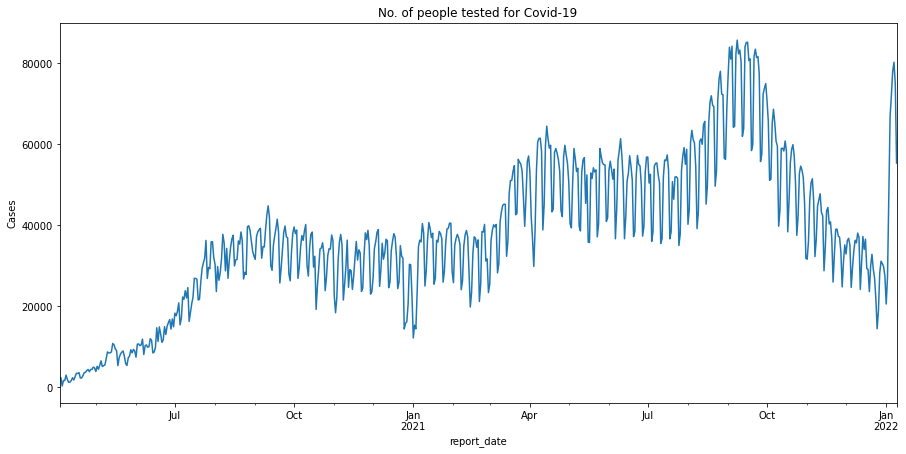

In [36]:
ax= df_test.resample('D', on='report_date').daily_output_unique_individuals.sum().plot(title="No. of people tested for Covid-19", figsize = (15, 7))
ax.set_ylabel("Cases")


Interpretation: Number of people getting tested for Covid-19 daily have gone down
from their September peak of about 80,000 during a surge. 

# Total samples tested each day

Number of samples may differ from number of individuals tested because some people undertake more than one test for confirmation.

In [37]:
df_test.resample('D', on='report_date').daily_output_samples_tested.sum().tail(15)

report_date
2021-12-26    19760.0
2021-12-27    29555.0
2021-12-28    33317.0
2021-12-29    31994.0
2021-12-30    31237.0
2021-12-31    28839.0
2022-01-01    21227.0
2022-01-02    28725.0
2022-01-03    50004.0
2022-01-04    70589.0
2022-01-05    77038.0
2022-01-06    81981.0
2022-01-07    84692.0
2022-01-08    79509.0
2022-01-09    60755.0
Freq: D, Name: daily_output_samples_tested, dtype: float64

# Two-week rolling average in testing

In [38]:
df_test.resample('D', on='report_date').daily_output_unique_individuals.sum().rolling(14).mean().round().tail(20)

report_date
2021-12-21    32518.0
2021-12-22    32012.0
2021-12-23    31394.0
2021-12-24    30244.0
2021-12-25    28633.0
2021-12-26    28257.0
2021-12-27    28066.0
2021-12-28    27631.0
2021-12-29    27383.0
2021-12-30    26894.0
2021-12-31    26754.0
2022-01-01    26144.0
2022-01-02    26396.0
2022-01-03    27596.0
2022-01-04    30033.0
2022-01-05    33100.0
2022-01-06    36742.0
2022-01-07    40906.0
2022-01-08    45228.0
2022-01-09    47832.0
Freq: D, Name: daily_output_unique_individuals, dtype: float64

<AxesSubplot:title={'center':'Two week rolling average in testing'}, xlabel='report_date'>

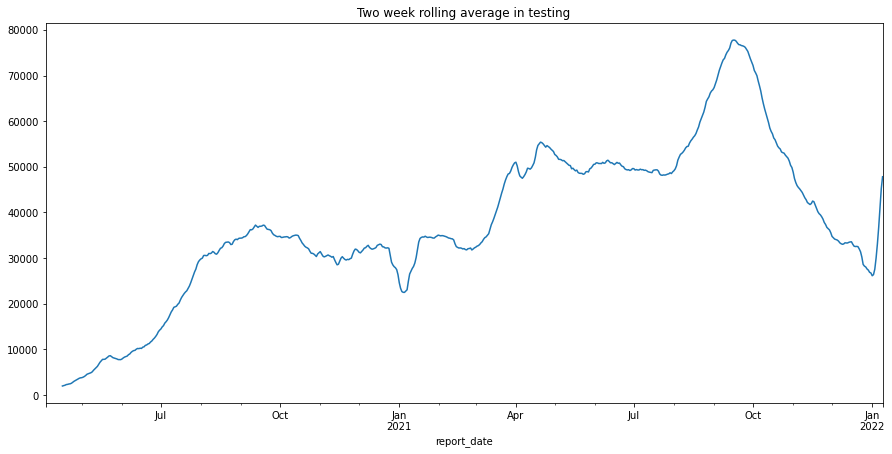

In [39]:
df_test.resample('D', on='report_date').daily_output_unique_individuals.sum().rolling(14).mean().plot(title='Two week rolling average in testing', figsize = (15, 7))


# How many people are tested each month?

### Monthly totals arranged from highest to lowest

Remove **sort_values(ascending=False)** to arrange it by date.

In [40]:
df_test.resample('M', on='report_date').daily_output_unique_individuals.sum().sort_values(ascending=False)

report_date
2021-09-30    2270631.0
2021-08-31    1876508.0
2021-10-31    1674413.0
2021-04-30    1571579.0
2021-07-31    1534758.0
2021-05-31    1525652.0
2021-06-30    1511158.0
2021-03-31    1378529.0
2021-11-30    1160857.0
2020-09-30    1073189.0
2020-10-31    1027587.0
2020-08-31    1017208.0
2021-01-31    1013076.0
2021-12-31     943242.0
2020-12-31     929690.0
2021-02-28     906997.0
2020-11-30     894039.0
2020-07-31     768793.0
2022-01-31     522477.0
2020-06-30     360407.0
2020-05-31     232175.0
2020-04-30      81089.0
Name: daily_output_unique_individuals, dtype: float64

<AxesSubplot:title={'center':'Testing slumps below 100k in Dec 2021'}, xlabel='report_date'>

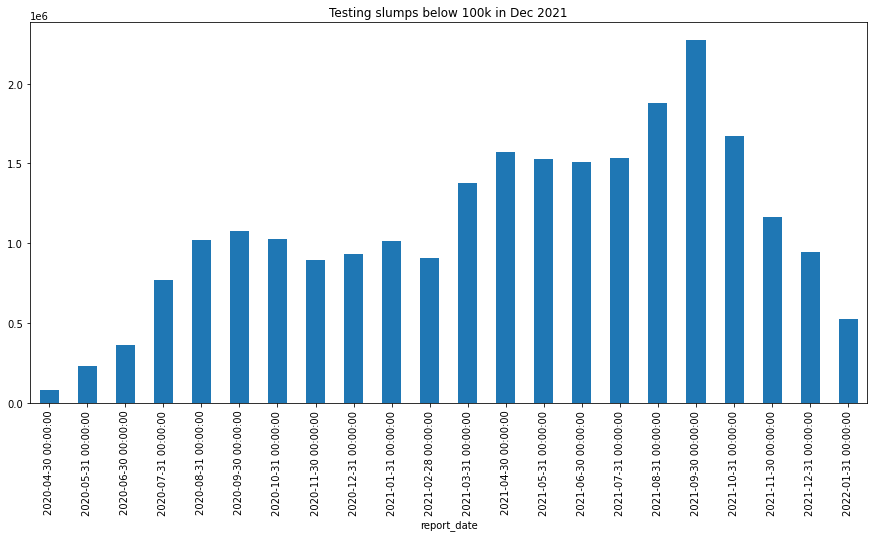

In [41]:
df_test.resample('M', on='report_date').daily_output_unique_individuals.sum().plot(kind="bar", title="Testing slumps below 100k in Dec 2021", figsize = (15, 7))


# Where do most positive individuals get tested?

Top 25

### Cumulative

In [42]:
df_test.groupby("facility_name").daily_output_positive_individuals.sum().sort_values(ascending=False).head(25)

facility_name
Philippine Red Cross - Port Area                                          159903.0
Detoxicare Molecular Diagnostics Laboratory                               159693.0
Philippine Red Cross (PRC)                                                 94099.0
Research Institute for Tropical Medicine (RITM)                            76140.0
Philippine Red Cross Logistics & Multipurpose Center                       72647.0
Baguio General Hospital and Medical Center                                 70727.0
Jose B. Lingad Memorial General Hospital                                   64053.0
Chinese General Hospital                                                   60553.0
Cebu TB Reference Laboratory - Molecular Facility for COVID-19 Testing     58514.0
Cagayan Valley Medical Center Molecular Laboratory                         54651.0
Southern Philippines Medical Center (SPMC)                                 51661.0
Ilocos Training and Regional Medical Center                              

### Monthly 

Ranked from highest to lowest number of tests.

In [43]:
df_test.groupby("facility_name").resample('M', on='report_date').daily_output_positive_individuals.sum().sort_values(ascending=False).head(25)


facility_name                                                           report_date
Philippine Red Cross - Port Area                                        2021-09-30     27547.0
                                                                        2021-08-31     23943.0
Detoxicare Molecular Diagnostics Laboratory                             2021-09-30     21316.0
Philippine Red Cross - Port Area                                        2021-04-30     20038.0
Detoxicare Molecular Diagnostics Laboratory                             2021-04-30     18665.0
Philippine Red Cross (PRC)                                              2021-09-30     18480.0
Ilocos Training and Regional Medical Center                             2021-09-30     17270.0
Baguio General Hospital and Medical Center                              2021-09-30     15865.0
Philippine Red Cross - Port Area                                        2021-03-31     15852.0
Detoxicare Molecular Diagnostics Laboratory                  

### Per testing site per month

Just change the name of the testing site after **df2.facility_name** to check other facilities.
Data show total monthly tests conducted per each facility.

Make it per day by just changing **'M'** in **resample** to **'D'**.

In [44]:
df_test[df_test.facility_name=="Philippine Red Cross - Port Area"].resample('M', on='report_date').daily_output_positive_individuals.sum()


report_date
2020-05-31      205.0
2020-06-30      482.0
2020-07-31     7488.0
2020-08-31    10269.0
2020-09-30     8200.0
2020-10-31     1880.0
2020-11-30     2090.0
2020-12-31     2090.0
2021-01-31     1585.0
2021-02-28     3189.0
2021-03-31    15852.0
2021-04-30    20038.0
2021-05-31     8407.0
2021-06-30     4583.0
2021-07-31     5584.0
2021-08-31    23943.0
2021-09-30    27547.0
2021-10-31     4570.0
2021-11-30     1031.0
2021-12-31     1158.0
2022-01-31     9712.0
Freq: M, Name: daily_output_positive_individuals, dtype: float64

# How many individuals test positive every day?

In [45]:
df_test.resample('D', on='report_date').daily_output_positive_individuals.sum().tail(25)

report_date
2021-12-16      330.0
2021-12-17      230.0
2021-12-18      225.0
2021-12-19      201.0
2021-12-20      278.0
2021-12-21      362.0
2021-12-22      398.0
2021-12-23      418.0
2021-12-24      453.0
2021-12-25      315.0
2021-12-26      481.0
2021-12-27     1271.0
2021-12-28     2062.0
2021-12-29     3155.0
2021-12-30     4391.0
2021-12-31     5482.0
2022-01-01     4284.0
2022-01-02     7434.0
2022-01-03    15230.0
2022-01-04    25101.0
2022-01-05    29004.0
2022-01-06    34246.0
2022-01-07    35230.0
2022-01-08    34368.0
2022-01-09    24377.0
Freq: D, Name: daily_output_positive_individuals, dtype: float64

# Turnaround time

The number of people that test positive each day does not match cases reported each day. And it's partly because of delays in testing results. Hence some results reported today could be from tests days ago. What's the average turnaround time in hours for tests?

In [46]:
df_test.avg_turnaround_time.value_counts().head(3)

48.0    36620
24.0    30741
72.0     7659
Name: avg_turnaround_time, dtype: int64

# Positivity rate

Computed by dividing the number of positive tests out of the total tests conducted each day. The World Health Organization considers 5% and below positivity rate as the virus spread being under control.

### Daily

We make a new dataframe for positivity rate for faster processing of data in succeeding analysis.
(Also, it throws an error merely putting **.plot()** at this code so making a new df for this solve that problem.
Below we only show the positivity rate for the last 30 days.

In [47]:
df_pos = df_test.resample('D', on='report_date').daily_output_positive_individuals.sum() / df_test.resample('D', on='report_date').daily_output_unique_individuals.sum() * 100
df_pos.tail(30)

report_date
2021-12-11     1.031485
2021-12-12     0.880056
2021-12-13     1.015918
2021-12-14     0.963396
2021-12-15     0.983530
2021-12-16     0.901492
2021-12-17     0.782739
2021-12-18     0.772957
2021-12-19     0.850146
2021-12-20     0.925310
2021-12-21     1.101576
2021-12-22     1.360916
2021-12-23     1.545344
2021-12-24     2.058249
2021-12-25     2.175414
2021-12-26     2.540940
2021-12-27     4.501505
2021-12-28     6.615123
2021-12-29    10.314165
2021-12-30    14.751235
2021-12-31    19.995623
2022-01-01    20.814304
2022-01-02    27.365089
2022-01-03    32.510780
2022-01-04    37.479842
2022-01-05    40.180093
2022-01-06    43.883749
2022-01-07    43.868606
2022-01-08    45.832555
2022-01-09    44.006571
Freq: D, dtype: float64

Text(0, 0.5, 'Positivity rate (%)')

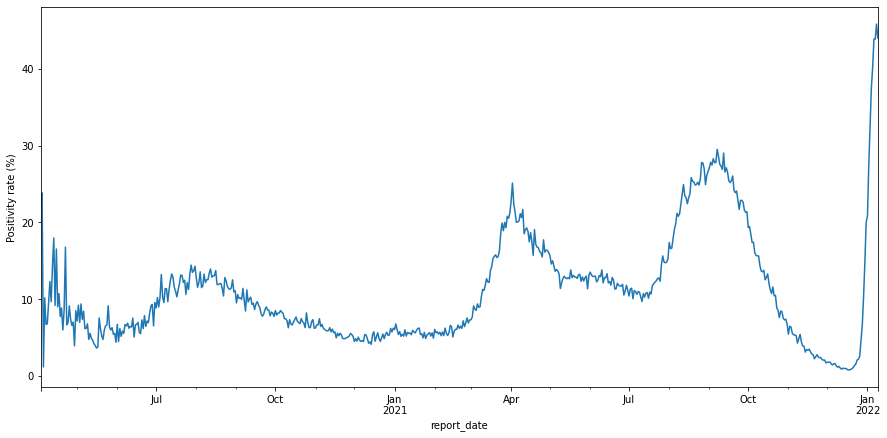

In [48]:
ax = df_pos.plot(figsize = (15, 7))
ax.set_ylabel("Positivity rate (%)")

# Save to CSVs

Just remove the hashtags!

While your testing data is in one CSV, cases are not. So now, you have the option to save it into one CSV. Note that you do not need to do this if you're using the dataframes (df) you generated above to process the data in Jupyter Notebook anytime.

### Entire case file from DOH

In [44]:
#df.to_csv("covidcases.csv", index=False)
#pd.read_csv("covidcases.csv")

### Provincial cases per day

In [45]:
#df_prov.to_csv("covid_prov.csv")
#pd.read_csv("covid_prov.csv")

### Municipal cases total

In [23]:
#df_munc.to_csv("covid_munc.csv")
#pd.read_csv("covid_munc.csv")

,ProvRes,CityMunRes,CityMunRes.1
0,ABRA,BANGUED (CAPITAL),896
1,ABRA,BOLINEY,184
2,ABRA,BUCAY,262
3,ABRA,BUCLOC,103
4,ABRA,DAGUIOMAN,58
...,...,...,...
1629,ZAMBOANGA SIBUGAY,ROSELLER LIM,137
1630,ZAMBOANGA SIBUGAY,SIAY,356
1631,ZAMBOANGA SIBUGAY,TALUSAN,48
1632,ZAMBOANGA SIBUGAY,TITAY,421
